# DBSCAN Kümeleme ile Iris Verisi Analizi

Bu not defterinde, Iris veri setinin sadece iki özelliği (Sepal Length ve Sepal Width) kullanılarak DBSCAN kümeleme algoritması uygulanmaktadır.  
Farklı `eps` ve `min_samples` parametre kombinasyonları ile model test edilip, oluşan küme sayıları görselleştirilmektedir.  
Veriler öncelikle ölçeklendirilerek standart normal dağılıma getirilmiştir, böylece mesafe tabanlı DBSCAN algoritmasının performansı artmıştır.


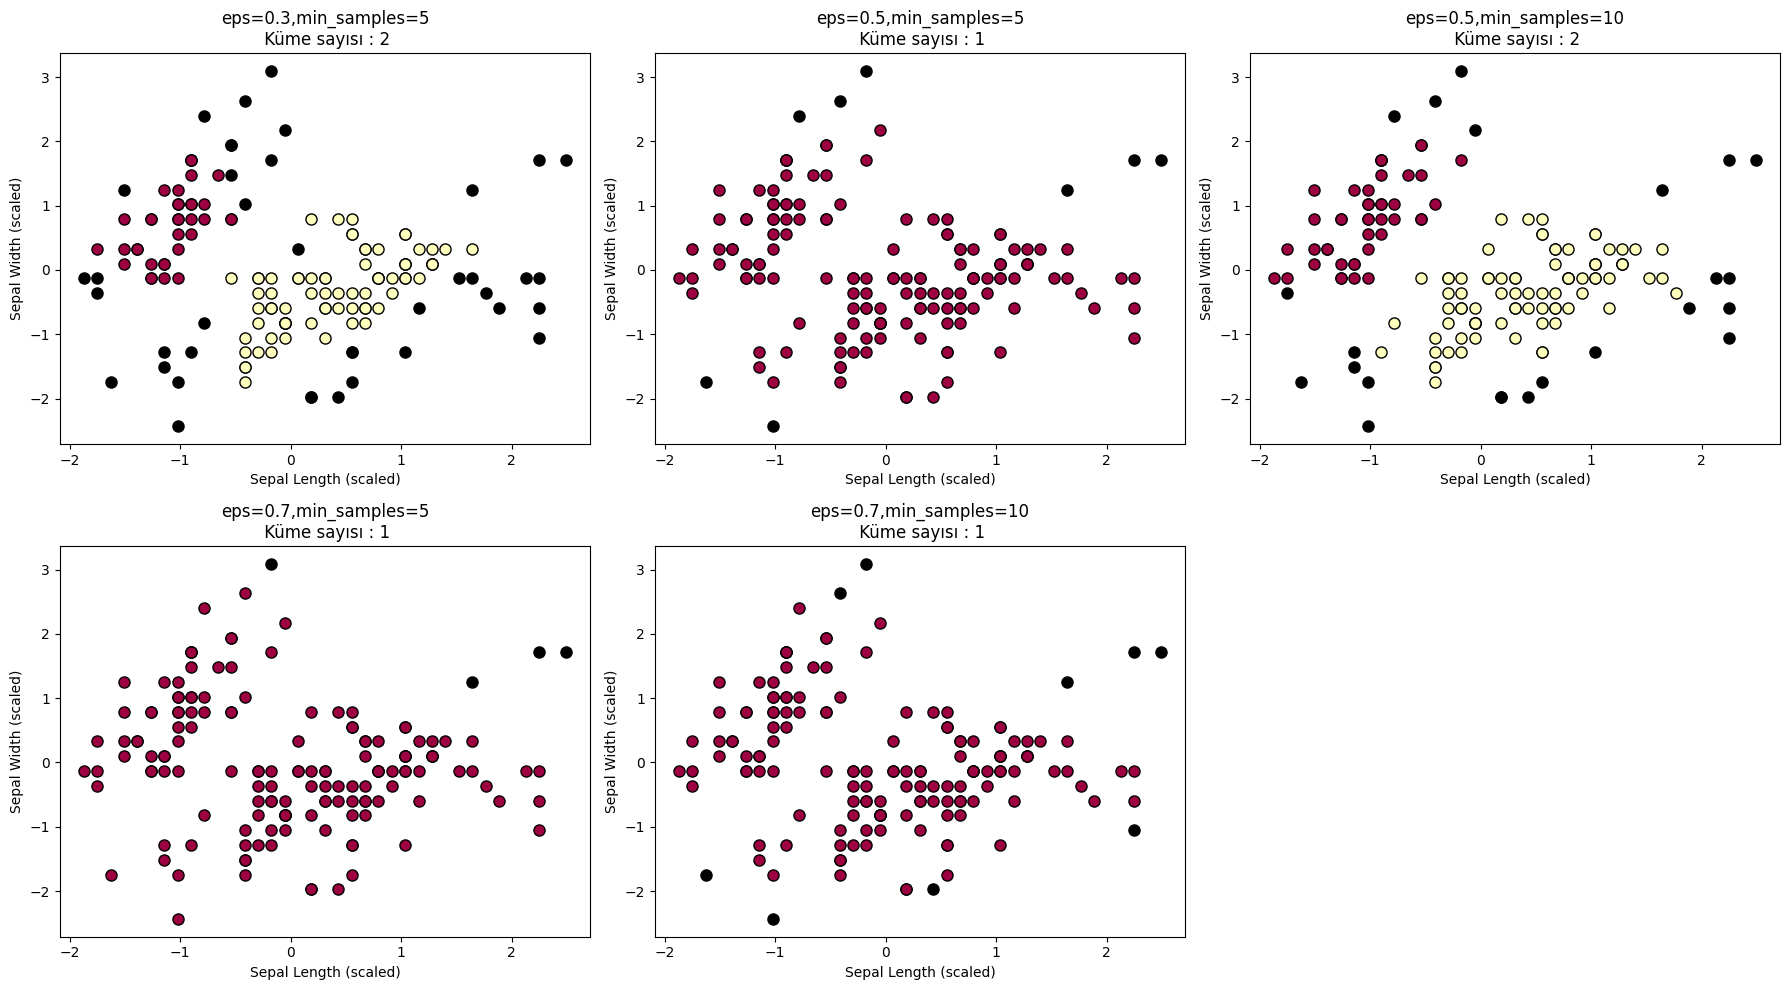

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Iris veri setini yükle, sadece ilk iki özelliği al (Sepal Length, Sepal Width)
iris = load_iris()
X = iris.data[:, :2]

# Veriyi ölçeklendir (mean=0, std=1)
X = StandardScaler().fit_transform(X)

# Farklı eps ve min_samples parametreleri denenecek
params = [
    (0.3, 5),
    (0.5, 5),
    (0.5, 10),
    (0.7, 5),
    (0.7, 10)
]

# Çoklu grafik için figür ve eksenler oluştur (2 satır, 3 sütun)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

# Her parametre kombinasyonu için DBSCAN çalıştır ve sonucu çiz
for i, (eps, min_samples) in enumerate(params):
    db = DBSCAN(eps=eps, min_samples=min_samples)
    labels = db.fit_predict(X)  # Küme etiketleri
    unique_labels = set(labels)
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))  # Renk paleti

    ax = axes[i]
    # Her küme için noktaları çiz
    for k, col in zip(unique_labels, colors):
        if k == -1:  # Gürültü noktaları siyah
            col = [0, 0, 0, 1]
        class_member_mask = (labels == k)
        xy = X[class_member_mask]
        ax.plot(xy[:, 0], xy[:, 1], 'o',
                markerfacecolor=tuple(col),
                markeredgecolor='k',
                markersize=8)
    ax.set_title(f'eps={eps}, min_samples={min_samples}\nKüme sayısı: {len(unique_labels) - (1 if -1 in labels else 0)}')
    ax.set_xlabel('Sepal Length (scaled)')
    ax.set_ylabel('Sepal Width (scaled)')

# Fazla eksenleri sil (parametre sayısından fazla olanlar)
if len(params) < len(axes):
    for j in range(len(params), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# DBSCAN Kümeleme ile Wine Veri Seti Analizi

Bu not defterinde, Wine veri seti üzerinde DBSCAN kümeleme algoritması uygulanmaktadır.  
Öznitelikler önce standartlaştırıldıktan sonra, boyut indirgeme için PCA kullanılarak 2 bileşene indirgenmiştir.  
Farklı `eps` ve `min_samples` parametreleri ile DBSCAN test edilip, kümeler görselleştirilmiştir.


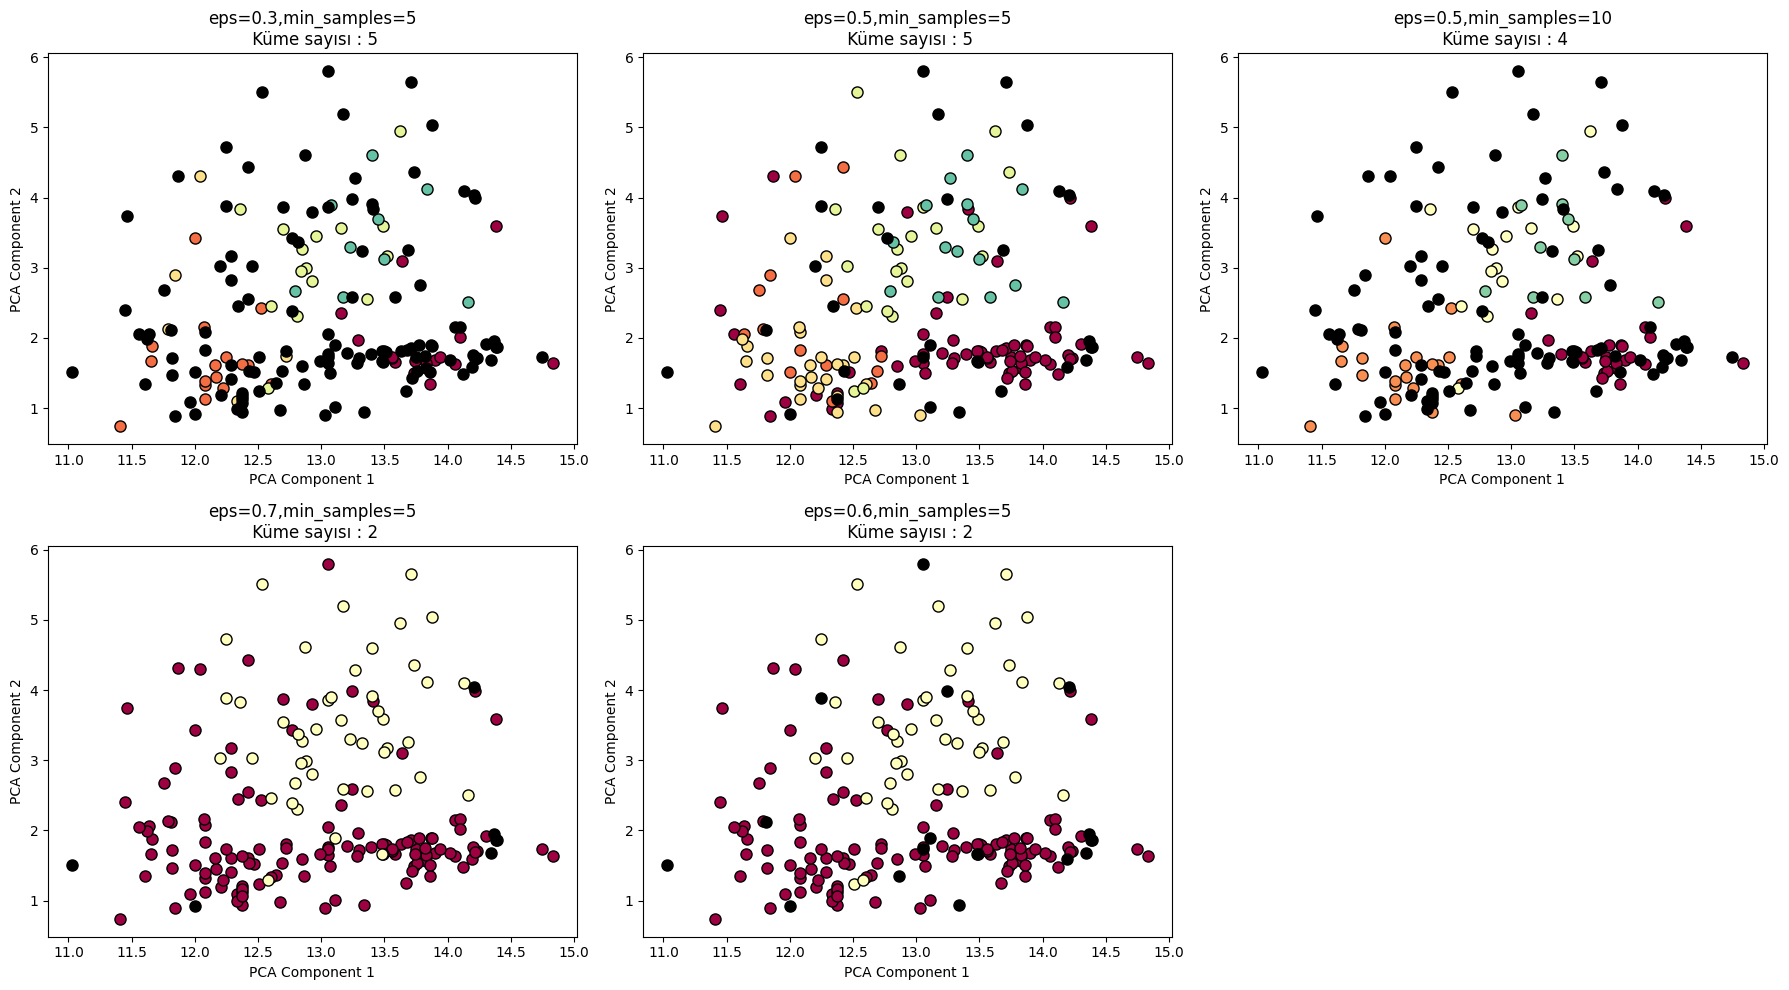

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Wine veri setini yükle
wine = load_wine()
X = wine.data

# Veriyi standartlaştır (ortalama=0, std=1)
X_scaled = StandardScaler().fit_transform(X)

# PCA ile boyut indirgeme (2 bileşen)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Farklı eps ve min_samples parametreleri ile DBSCAN test edilecek
params = [
    (0.3, 5),
    (0.5, 5),
    (0.5, 10),
    (0.7, 5),
    (0.6, 5)
]

# Çoklu grafik için figür ve eksenler oluştur (2 satır, 3 sütun)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

# Her parametre kombinasyonu için DBSCAN çalıştır ve sonucu çiz
for i, (eps, min_samples) in enumerate(params):
    db = DBSCAN(eps=eps, min_samples=min_samples)
    labels = db.fit_predict(X_pca)  # Küme etiketleri
    unique_labels = set(labels)
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))  # Renk paleti

    ax = axes[i]
    # Her küme için noktaları çiz
    for k, col in zip(unique_labels, colors):
        if k == -1:  # Gürültü noktaları siyah
            col = [0, 0, 0, 1]
        class_member_mask = (labels == k)
        xy = X_pca[class_member_mask]
        ax.plot(xy[:, 0], xy[:, 1], 'o',
                markerfacecolor=tuple(col),
                markeredgecolor='k',
                markersize=8)
    ax.set_title(f'eps={eps}, min_samples={min_samples}\nKüme sayısı: {len(unique_labels) - (1 if -1 in labels else 0)}')
    ax.set_xlabel('PCA Component 1')
    ax.set_ylabel('PCA Component 2')

# Fazla eksenleri sil (parametre sayısından fazla olanlar)
if len(params) < len(axes):
    for j in range(len(params), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Sonuç ve Açıklama
Bu çalışmada Wine veri seti üzerinde DBSCAN algoritması uygulanmıştır. Veriler öncelikle StandardScaler ile ölçeklendirilmiş, ardından PCA yöntemiyle boyut indirgeme yapılarak iki bileşene düşürülmüştür. Böylece verinin ana yapısı korunurken, görselleştirme ve kümeleme işlemi kolaylaşmıştır.

DBSCAN, yoğunluk tabanlı bir kümeleme algoritmasıdır ve veri noktalarının yoğun olduğu bölgeleri kümeler olarak tanımlar. eps parametresi, bir noktanın komşuluk yarıçapını belirlerken, min_samples ise bir noktanın çekirdek nokta olabilmesi için gereken minimum komşu sayısını ifade eder. Bu parametrelerin farklı kombinasyonları denenerek, kümelerin sayısı ve yapısı incelenmiştir.

Sonuçlar göstermektedir ki, parametrelerdeki küçük değişiklikler bile küme sayısı ve gürültü noktalarının belirlenmesinde önemli etkiye sahiptir. Bu nedenle DBSCAN uygulamalarında parametre seçimi dikkatle yapılmalıdır. Ayrıca, PCA gibi boyut indirgeme yöntemleri, yüksek boyutlu verilerde algoritmanın performansını artırmak ve sonuçları yorumlamayı kolaylaştırmak için oldukça faydalıdır.